<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/ProjectPart6Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 6

##Linear Regression

In [2]:
#Load your packages
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pa


%matplotlib inline

In [3]:
#https://docs.scipy.org/doc/scipy/reference/stats.html

# Time For Data 

In [4]:
data = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Applied_Stats_Jupyter_Notebooks/master/blues.csv') #this file is sitting in a github repository.  I click the raw button to find this link

In [5]:
data

,Rk,Player,From,To,Yrs,Lg,GP,G,A,PTS,+/-,PIM,EV,PP,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI
0,1,Bruce Affleck\afflebr01,1975,1979,5,NHL,274,14,65,79,-81,86,10,4,0,2,48,14,3,363,3.9,NaN,NaN
1,2,Kenny Agostino\agostke01,2017,2017,1,NHL,7,1,2,3,0,2,1,0,0,0,1,1,0,17,5.9,89.0,12:47
2,3,Glenn Anderson*\andergl01,1995,1996,2,NHL,51,14,16,30,-2,43,12,2,0,3,13,3,0,89,15.7,NaN,NaN
3,4,Perry Anderson\anderpe01,1982,1985,4,NHL,144,22,18,40,-14,355,22,0,0,2,18,0,0,168,13.1,NaN,NaN
4,5,Ron Anderson\anderro01,1970,1970,1,NHL,59,9,9,18,9,36,8,1,0,0,8,1,0,107,8.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,592,Joe Zanussi\zanusjo01,1977,1977,1,NHL,11,0,3,3,-6,4,0,0,0,0,1,2,0,11,0.0,NaN,NaN
592,593,Peter Zezel\zezelpe01,1989,1997,4,NHL,217,54,105,159,-6,81,39,14,1,9,57,47,1,409,13.2,NaN,NaN
593,594,Mike Zigomanis\zigommi01,2006,2006,1,NHL,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,15.0,7:39
594,595,Rick Zombo\zombori01,1992,1995,4,NHL,232,6,42,48,-6,233,6,0,0,1,36,3,3,161,3.7,NaN,NaN


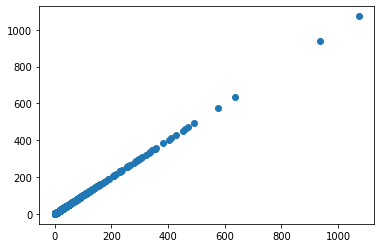

In [6]:
#Let's use something that is perfectly correlated!  Goals+Assists = points so these should be identical
plt.scatter(data["G"]+data["A"],data["PTS"])

In [7]:
#Correlation will be the pearsonr function it also returns your p value
stats.pearsonr(data["G"]+data["A"],data["PTS"])

(1.0, 0.0)

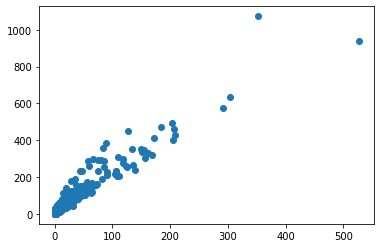

In [8]:
#That one was boring, let's try again. 
plt.scatter(data["G"],data["PTS"])

In [9]:
#Still one heck of a 
stats.pearsonr(data["G"],data["PTS"])

(0.9589718106521393, 0.0)

# Time for Regression Lines

I am going to do it by hand and then by using the scipy stats package.

For the by hand method, we note that for a regression of the form, $\hat y = a_0+a_1 x$ 

$$
a_1=\frac{\sum x_i y_i -n \bar x \bar y}{\sum x_i^2 - n\bar x ^2}
$$
and
$$
a_0 = \bar y - a_1 \bar x
$$

In [10]:
def sum(list):
  total = 0
  for i in list:
    total = total + i
  return total

def squareAndSum(list1,list2):
  total = 0
  for i in range(len(list1)):
    total = total + list1[i]*list2[i]
  return total



In [12]:
n = len(data['G'])
xbar = sum(data['G'])/n
ybar = sum(data['PTS'])/n
xy = squareAndSum(data['G'],data['PTS'])
xx = squareAndSum(data['G'],data['G'])

a1 = (xy-n*xbar*ybar)/(xx-n*xbar**2)
a0 = ybar - a1*xbar

In [13]:
def fomulaRegression(variable,slope, intercept):
  return variable*slope+intercept

In [14]:
print(a1)
a0

2.237289457257875


8.914999455919691

Let's run through the package too to check my work.

In [ ]:
stats.linregress(data["G"],data["PTS"])

LinregressResult(slope=2.2372894572578783, intercept=8.914999455919627, rvalue=0.9589718106521405, pvalue=0.0, stderr=0.027138033947613067)

In [ ]:
#Easy right?  Let's make it into something useable too
m = stats.linregress(data["G"],data["PTS"])[0]
b = stats.linregress(data["G"],data["PTS"])[1]
def y(x):
    return(m*x+b)
    


In [ ]:
y(3)

15.626867827693262

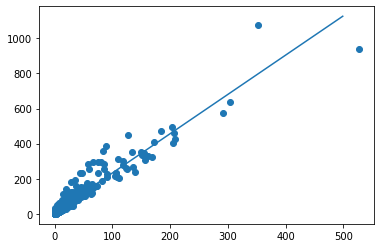

In [ ]:
x = np.arange( 0,500,1)
plt.scatter(data["G"],data["PTS"])
plt.plot(x,y(x))

In [ ]:
#sum of the residuals
s = 0
for i in range (0,len(data["G"])):
    s = s+y(data["G"][i])-data["PTS"][i]

In [ ]:
#Should be zero
s

1.6200374375330284e-12

In [ ]:
#Sum of Squares of Residuals
ss = 0
for i in range (0,len(data["G"])):
    ss = ss+(y(data["G"][i])-data["PTS"][i])**2

In [ ]:
#This is the thing that is minimized
ss

516693.1634258639

# Nonlinear Regression

I know several ways to do non-linear regression.  First I will follow the example in the text.  I will attempt to fit a quadratic to the data.  The text shows that we should solve a system of equations 
$$
\left[
\begin{array}{ccc|c}
n& \sum x_i&\sum x_i^2&\sum y_i\\
\sum x_i&\sum x_i^2&\sum x_i^3&\sum x_i y_i\\
\sum x_i^2 &\sum x_i^3&\sum x_i^4&\sum x_i^2 y_i
\end{array}
\right]
$$
To get the $a_0$, $a_1$, and $a_2$ that will minimize the least squares and return
$$
\hat y = a_0+a_1 x+a_2 x^2
$$

I need some data that this makes sense to do with.

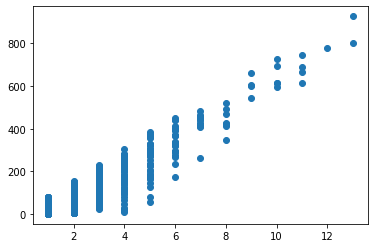

In [16]:
plt.scatter(data["Yrs"],data["GP"])

A quadratic might make sense here...

In [18]:
x = sum(data['Yrs'])
xx = squareAndSum(data['Yrs'],data['Yrs'])
xxx = squareAndSum(data['Yrs']**2,data['Yrs'])
xxxx = squareAndSum(data['Yrs']**3,data['Yrs'])

matrix = [[n,x,xx,sum(data['GP'])]
          ,[x,xx,xxx,squareAndSum(data['Yrs'],data['GP'])]
          ,[xx,xxx,xxxx,squareAndSum(data['Yrs']**2,data['GP'])]
          ]



I need to load up my matrix solver from Part 4.

In [19]:
import math
import numpy as np
import scipy.linalg as la

def addRows(matrix,targetRow, modifierRow, value):
  newRow = matrix[targetRow,:]+value*matrix[modifierRow,:]
  newMatrix = []
  for i in range(len(matrix)):
    if i != targetRow:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(newRow)
  return np.array(newMatrix)


def changeToLeadingOne(matrix,row,column):
  newMatrix =[]
  for i in range(len(matrix)):
    if i != row:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(1/matrix[row,column]*matrix[row,:])
  return np.array(newMatrix)


def gaussJordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = changeToLeadingOne(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix

In [21]:
gaussJordan(np.array(matrix))

array([[ 1.00000000e+00,  0.00000000e+00, -1.77635684e-15,
        -2.97111806e+01],
       [ 0.00000000e+00,  1.00000000e+00,  1.77635684e-15,
         4.74568941e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.86656181e+00]])

There seem to be some floating point problems with my solution, (a few un expected non-zeros).  In any case, I believe my solution is 
$$
\hat y = -29.71+47.45 x +1.87 x^2
$$

Let me try this with another method.  Linear algebra tells us that for a data matrix $A$  and the output data $y$ the coefficients can be solved by computing
$$
\left(A^TA\right)^{-1}A^T y
$$

To do this here with just one input we will have to create each row in $A$ by doing $[1,x,x^2]$

In [26]:
def rowCreator(input,order):
  row = []
  for i in range(order+1):
    row.append(input**i)
  return row

def matrixCreator(list, order):
  matrix = []
  for i in list:
    matrix.append(rowCreator(i,order))
  return matrix

In [29]:
A = np.array(matrixCreator(data['Yrs'],2))
y = np.array(data['GP'])

In [34]:
np.linalg.inv(np.transpose(A)@ A)@ np.transpose(A)@ y

array([-29.71118061,  47.45689406,   1.86656181])

Pretty darn close!  Let's graph it to finish!

In [35]:
results = np.linalg.inv(np.transpose(A)@ A)@ np.transpose(A)@ y

def quadRegression(x):
  return results[0]+x*results[1]+results[2]*x**2

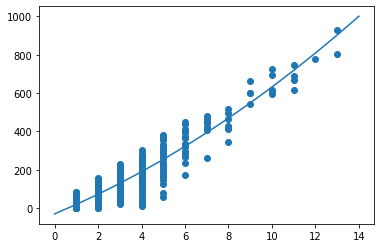

In [36]:
x = np.arange( 0,15,1)
plt.scatter(data["Yrs"],data["GP"])
plt.plot(x,quadRegression(x))